In [2]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import os

In [3]:
client_id = os.environ.get('CLIENT_ID')
api_key = os.environ.get('API_KEY')

pip install yelpapi

In [4]:
from yelpapi import YelpAPI
yelp_api = YelpAPI(api_key)

In [5]:
headers = {
    "Authorization": f"Bearer {api_key}"
}
params = {
    "term": 'In-N-Out',
    "location": 'Cerritos, CA',
    "limit": 50
}

response = requests.get("https://api.yelp.com/v3/businesses/search", headers=headers, params=params)
type(response)

requests.models.Response

In [6]:
data = json.loads(response.text)
businesses = data["businesses"]

In [7]:
cols = list(businesses[0].keys())
data = pd.DataFrame(columns=cols)

for biz in businesses:
    data = data.append(biz, ignore_index=True)

In [8]:
filtered_df = data[data['name'] == 'In-N-Out Burger']
filtered_df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,jvqIT26eqoy0MKHTlJeKPg,in-n-out-burger-cerritos,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/9Wv2ro...,False,https://www.yelp.com/biz/in-n-out-burger-cerri...,238,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.7,"{'latitude': 33.8871791, 'longitude': -118.101...",[],$,"{'address1': '10900 Alondra Blvd', 'address2':...",+18007861000,(800) 786-1000,3879.021810
1,4k5O_JWomW-OVbNM53ETVA,in-n-out-burger-buena-park,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/MTTywq...,False,https://www.yelp.com/biz/in-n-out-burger-buena...,434,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.9,"{'latitude': 33.8473088, 'longitude': -118.028...",[],$,"{'address1': '7926 Valley View', 'address2': '...",+18007861000,(800) 786-1000,4263.317269
2,tyn8d_6PjJuQB8SJoXyiQQ,in-n-out-burger-la-mirada,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/ES5HdM...,False,https://www.yelp.com/biz/in-n-out-burger-la-mi...,322,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.2,"{'latitude': 33.8825721740723, 'longitude': -1...",[],$$,"{'address1': '14341 Firestone Blvd', 'address2...",+18007861000,(800) 786-1000,4489.894960
3,MYrpKWjk2vgtIJ6TPnztEw,in-n-out-burger-bellflower,In-N-Out Burger,https://s3-media4.fl.yelpcdn.com/bphoto/LFRyy7...,False,https://www.yelp.com/biz/in-n-out-burger-bellf...,121,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",3.4,"{'latitude': 33.8751, 'longitude': -118.12539}",[],$,"{'address1': '17325 Bellflower Blvd', 'address...",+18007861000,(800) 786-1000,5340.807017
4,ey6y0FjWuRGUP203PcZkXg,in-n-out-burger-lakewood,In-N-Out Burger,https://s3-media4.fl.yelpcdn.com/bphoto/LmoC13...,False,https://www.yelp.com/biz/in-n-out-burger-lakew...,305,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.1,"{'latitude': 33.861028, 'longitude': -118.124673}",[],$$,"{'address1': '5820 Bellflower Blvd', 'address2...",+18007861000,(800) 786-1000,5193.091386
5,22iH2uAN3qMgYy8U05seTA,in-n-out-burger-long-beach,In-N-Out Burger,https://s3-media1.fl.yelpcdn.com/bphoto/RoeeVo...,False,https://www.yelp.com/biz/in-n-out-burger-long-...,338,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.2,"{'latitude': 33.831071, 'longitude': -118.084846}",[],$,"{'address1': '7691 Carson St', 'address2': '',...",+18007861000,(800) 786-1000,4114.694139
6,m4-UF_JqTZcn8rJLvGhIow,in-n-out-burger-signal-hill,In-N-Out Burger,https://s3-media3.fl.yelpcdn.com/bphoto/cRMHoX...,False,https://www.yelp.com/biz/in-n-out-burger-signa...,471,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",4.2,"{'latitude': 33.8120634, 'longitude': -118.183...",[],$,"{'address1': '799 E Spring St', 'address2': ''...",+18007861000,(800) 786-1000,12145.774967
7,5p-067ViGXujqgmleDR-mA,in-n-out-burger-anaheim,In-N-Out Burger,https://s3-media4.fl.yelpcdn.com/bphoto/ZQ6VEO...,False,https://www.yelp.com/biz/in-n-out-burger-anahe...,446,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.7,"{'latitude': 33.8248573, 'longitude': -117.958...",[],$,"{'address1': '600 S Brookhurst', 'address2': '...",+18007861000,(800) 786-1000,11137.000461
8,gETaNOUcYoS03E_gIjdMNA,in-n-out-burger-norwalk,In-N-Out Burger,https://s3-media2.fl.yelpcdn.com/bphoto/rpFAQ2...,False,https://www.yelp.com/biz/in-n-out-burger-norwa...,221,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.4,"{'latitude': 33.901222, 'longitude': -118.0823...",[],$,"{'address1': '14330 Pioneer Blvd', 'address2':...",+18007861000,(800) 786-1000,4160.452196
9,IUcRMb8OXKFyt1zxcDL3uQ,in-n-out-burger-long-beach-2,In-N-Out Burger,https://s3-media1.fl.yelpcdn.com/bphoto/TMFEQ3...,False,https://www.yelp.com/biz/in-n-out-burger-long-...,475,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",4.1,"{'latitude': 33.7911956966296, 'longitude': -1...",[],$,"{'address1': '4600 Los Coyotes Diagonal', 'add...",+18007861000,(800) 786-1000,10579.256210


In [9]:
filtered_df['url']

0     https://www.yelp.com/biz/in-n-out-burger-cerri...
1     https://www.yelp.com/biz/in-n-out-burger-buena...
2     https://www.yelp.com/biz/in-n-out-burger-la-mi...
3     https://www.yelp.com/biz/in-n-out-burger-bellf...
4     https://www.yelp.com/biz/in-n-out-burger-lakew...
5     https://www.yelp.com/biz/in-n-out-burger-long-...
6     https://www.yelp.com/biz/in-n-out-burger-signa...
7     https://www.yelp.com/biz/in-n-out-burger-anahe...
8     https://www.yelp.com/biz/in-n-out-burger-norwa...
9     https://www.yelp.com/biz/in-n-out-burger-long-...
10    https://www.yelp.com/biz/in-n-out-burger-downe...
11    https://www.yelp.com/biz/in-n-out-burger-anahe...
12    https://www.yelp.com/biz/in-n-out-burger-westm...
25    https://www.yelp.com/biz/in-n-out-burger-seal-...
26    https://www.yelp.com/biz/in-n-out-burger-long-...
31    https://www.yelp.com/biz/in-n-out-burger-santa...
Name: url, dtype: object

Rating, review, date

pages of review div class=" border-color--default__09f24__NPAKY text-align--center__09f24__fYBGO

rating/date div class=" margin-t1__09f24__w96jn margin-b1-5__09f24__NHcQi border-color--default__09f24__NPAKY"
review p class="comment_09f24__D0cxf css-qgunke"

In [10]:
filtered_df['url'][0]

'https://www.yelp.com/biz/in-n-out-burger-cerritos?adjust_creative=aLmjxIidygN62xkbHFc5eA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=aLmjxIidygN62xkbHFc5eA'

In [11]:
# url = filtered_df['url'][0]
data = []
headers = {
    "Authorization": f"Bearer {api_key}"
}
for url in filtered_df['url']:
    new_page = "&start={}"
    response = requests.get(url, headers=headers)
    content = response.content
    soup = BeautifulSoup(content, "html.parser")

    max_page = 1
    pages = soup.find('div', 'aria-label'=="Pagination navigation")
    if pages:
        number_of_pages = pages.find('div', class_="css-1aq64zd")
        if number_of_pages:
            text_content = number_of_pages.getText().split()
            max_page = text_content[2]
        else:
            print("Inner element not found.")
    else:
        print("Outer element not found.")
    total_reviews = int(max_page) * 10

    for i in range(0, total_reviews, 10):
        new_page_url = url + new_page.format(i)
        new_response = requests.get(new_page_url, headers=headers)
        new_content = new_response.content
        new_soup = BeautifulSoup(new_content, "html.parser")

        li = new_soup.find_all('li', class_="css-1q2nwpv")
        for review in li:
            row_data = []
            rating = review.find('span', class_="css-1d8srnw")
            if rating == None:
                continue
            num_of_stars = rating.find('div', class_="css-14g69b3")["aria-label"].split()[0]
            date = review.find('span', class_="css-chan6m")
            description = review.find('span', class_="raw__09f24__T4Ezm")
            row_data.append(date.getText())
            row_data.append(num_of_stars)
            row_data.append(description.getText())
            data.append(row_data)

In [12]:
df = pd.DataFrame(data, columns =["date", "rating", "reviews"])
df['rating'] = df['rating'].astype(int)
df.reset_index(drop=True, inplace=True)

In [13]:
df

,date,rating,reviews
0,"Sep 18, 2023",5,I come here all of the time and usually go thr...
1,"Oct 2, 2023",3,In and out is in and out. Burgers and drinks a...
2,"Jan 13, 2024",5,Came here on a Saturday at 3 pm and the drive ...
3,"Feb 4, 2024",4,"I usually order well-done fries, but they neve..."
4,"Aug 12, 2023",5,"The food was great, the service was fast even ..."
...,...,...,...
4904,"Jun 26, 2016",5,"we eat here at an often basis, but we have nev..."
4905,"Jun 15, 2016",5,"love this in and out, the service here is fast..."
4906,"May 11, 2011",5,"Always, always good. They do it right every t..."
4907,"Mar 25, 2013",5,what can i say i love in & out i just hate wai...


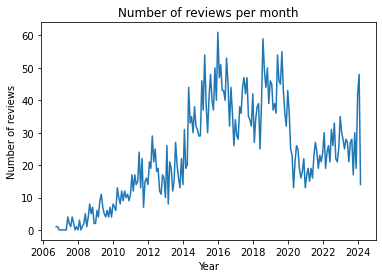

In [14]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

plt.plot(df['reviews'].resample('M').count())
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')
plt.show()

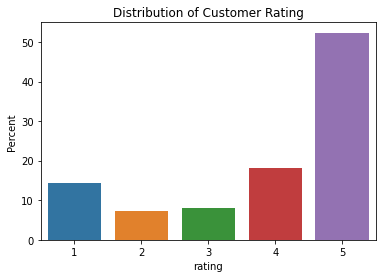

In [15]:
import seaborn as sns

ax = sns.barplot(data=df, x='rating', y='rating', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

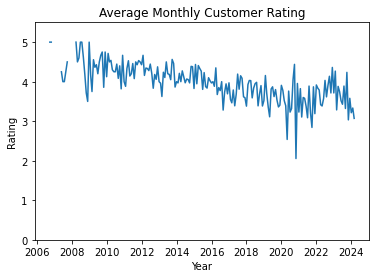

In [16]:
plt.plot(df['rating'].resample('M').mean())
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0,5.5)
plt.show()

!pip install langdetect

In [17]:
from langdetect import detect_langs

language = [detect_langs(i) for i in df.reviews]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [18]:
df['language'].value_counts()

en    4906
es       1
fr       1
tl       1
Name: language, dtype: int64

In [19]:
df.loc[df['language'] == 'es']

,rating,reviews,language
date,,,
2023-05-10,5,Las hamburguesas están muy deliciosas muchas g...,es


In [20]:
df = df.drop(df.loc[df['language'] == 'es'].index)

In [21]:
df.loc[df['language'] == 'fr']

,rating,reviews,language
date,,,
2012-05-23,5,"Animal Style Fries, Animal style double double...",fr


In [22]:
df['language'].value_counts()

en    4904
fr       1
tl       1
Name: language, dtype: int64

pip install "numpy<1.20.0"

In [1]:
import nltk
nltk.download('stopwords')

C:\Users\Patrick\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place'])

C:\Users\Patrick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


!pip install wordcloud

pip install --upgrade --user pillow

pip install --upgrade --user pip

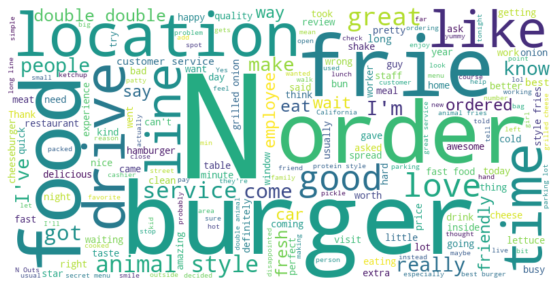

In [24]:
from wordcloud import WordCloud
full_text = ' '.join(df['reviews'])

cloud_no_stopword = WordCloud(width=800, height=400, background_color='white', stopwords=my_stop_words).generate(full_text)
plt.figure(figsize=(10,5))
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist

lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)

tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)

token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])
dist = dist.iloc[::-1]

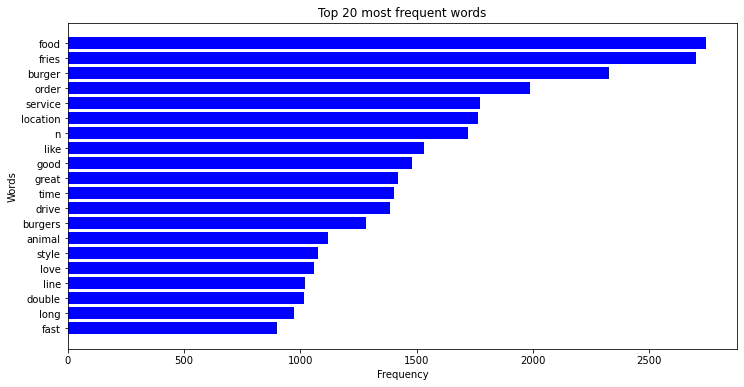

In [26]:
plt.figure(figsize=(12,6))
plt.barh(dist['Word'], dist['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most frequent words')
plt.show()

In [27]:
#N-grams
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words=my_stop_words, ngram_range=(2,2))

bigrams = vect.fit_transform(df['reviews'])
bigram_df=pd.DataFrame(bigrams.toarray(), columns=vect.get_feature_names())

bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()

bigram_frequency.columns = ['bigram', 'frequency']
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)

bigram_frequency = bigram_frequency.iloc[::-1]

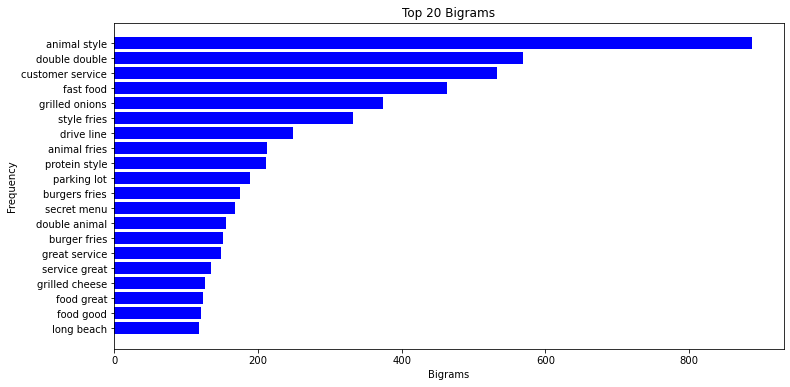

In [28]:
plt.figure(figsize=(12,6))
plt.barh(bigram_frequency['bigram'], bigram_frequency['frequency'], color='blue')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 20 Bigrams')
plt.show()

In [29]:
from nltk.tokenize import sent_tokenize
import re

df_good = df[df['rating'].isin([4,5])]

good_reviews = ' '.join(df_good.reviews)

#split long string into sentences
sentences_good = sent_tokenize(good_reviews)

good_token_clean = list()

#get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [30]:
print(sentences_good[:3])

['I come here all of the time and usually go through the drive thru where I never have to wait too long to get my burger.', "Sometimes the line looks really long but don't let that scare you because it goes by pretty quick.", "The most I've ever had to wait was probably 20 minutes, but it's always well worth the wait.The workers are always very nice too, no attitude or rudeness, just cordial and polite."]


In [31]:
print(good_token_clean[:3])

[['come', 'time', 'usually', 'drive', 'wait', 'long', 'burger'], ['line', 'looks', 'really', 'long', 'let', 'scare', 'goes', 'pretty', 'quick'], ['wait', 'probably', 'minutes', 'worth', 'wait', 'workers', 'nice', 'attitude', 'rudeness', 'cordial', 'polite']]


pip install gensim

In [32]:
from gensim.models import Word2Vec

model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
similar_words = model_ted.wv.most_similar('service', topn=10)

print(similar_words)

C:\Users\Patrick\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


[('customer', 0.9978858232498169), ('friendly', 0.9951431155204773), ('fast', 0.9947386980056763), ('great', 0.9925321936607361), ('excellent', 0.9914232492446899), ('staff', 0.9885799884796143), ('clean', 0.9883460998535156), ('superb', 0.9848636388778687), ('competent', 0.9841593503952026), ('efficient', 0.9836113452911377)]


In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Patrick\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
sid = SentimentIntensityAnalyzer()

sentiment_scores = df['reviews'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

monthly_sentiment = sentiment.resample('M').mean()

In [38]:
monthly_sentiment

date
2006-09-30   -0.946800
2006-10-31    0.996800
2006-11-30         NaN
2006-12-31         NaN
2007-01-31         NaN
                ...   
2023-10-31    0.177163
2023-11-30    0.419247
2023-12-31    0.298655
2024-01-31    0.438946
2024-02-29    0.572900
Freq: M, Name: reviews, Length: 210, dtype: float64

In [42]:
filtered_sentiment = monthly_sentiment['2018':'2024']

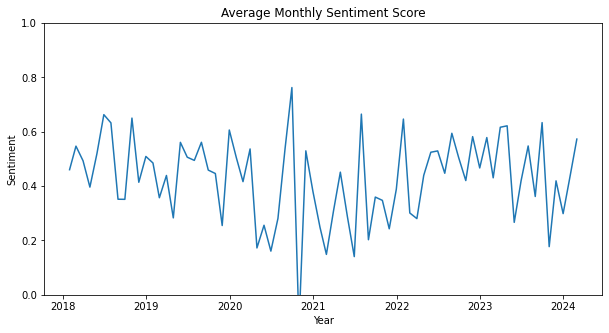

In [43]:
plt.figure(figsize=(10,5))
plt.plot(filtered_sentiment)
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('Average Monthly Sentiment Score')
plt.ylim(0,1)
plt.show()

In [44]:
df.head()

,rating,reviews,language
date,,,
2023-09-18,5,I come here all of the time and usually go thr...,en
2023-10-02,3,In and out is in and out. Burgers and drinks a...,en
2024-01-13,5,Came here on a Saturday at 3 pm and the drive ...,en
2024-02-04,4,"I usually order well-done fries, but they neve...",en
2023-08-12,5,"The food was great, the service was fast even ...",en


In [45]:
df['label'] = df['rating'].apply(lambda x: 1 if x >= 3 else 0)

In [47]:
df['label'].value_counts()

1    3845
0    1061
Name: label, dtype: int64

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vect = CountVectorizer(max_features=300, stop_words=my_stop_words)
vect.fit(df.reviews)
X = vect.transform(df.reviews)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

y = df.label
X = X_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)
y_pred_lg = log_reg.predict(X_test)

log_odds = log_reg.coef_[0]
coeff = pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

In [51]:
coeff.head()

,coef
awesome,2.263578
best,1.711702
delicious,1.686163
amazing,1.636275
favorite,1.613705


In [52]:
coeff.tail()

,coef
cold,-1.096035
customers,-1.329254
horrible,-1.463491
used,-1.871687
worst,-2.475655


In [54]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_accuracy = accuracy_score(y_test, pred)
nb_precision = precision_score(y_test, pred)
nb_recall = recall_score(y_test, pred)
nb_f1 = f1_score(y_test, pred)

print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)

Accuracy: 0.8702445652173914
Precision: 0.9242290748898678
Recall: 0.9090121317157712
F1 Score: 0.9165574486675405


In [62]:
lr_accuracy = accuracy_score(y_test, y_pred_lg)
lr_precision = precision_score(y_test, y_pred_lg)
lr_recall = recall_score(y_test, y_pred_lg)
lr_f1 = f1_score(y_test, y_pred_lg)

print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Accuracy: 0.8756793478260869
Precision: 0.9055973266499582
Recall: 0.9393414211438474
F1 Score: 0.9221607826456827


In [64]:
data = {'Accuracy': [lr_accuracy, nb_accuracy], 'Precision': [lr_precision, nb_precision], 'Recall': [lr_recall, nb_recall], 'F1': [lr_f1, nb_f1]}
index = ['Logistic Regression', 'Naive Bayes']

metric_df = pd.DataFrame(data, index=index)

In [66]:
metric_df

,Accuracy,Precision,Recall,F1
Logistic Regression,0.875679,0.905597,0.939341,0.922161
Naive Bayes,0.870245,0.924229,0.909012,0.916557
